# Data Scientist Professional Practical Exam Submission

**Use this template to write up your summary for submission. Code in Python or R needs to be included.**


## 📝 Task List

Your written report should include both code, output and written text summaries of the following:
- Data Validation:   
  - Describe validation and cleaning steps for every column in the data 
- Exploratory Analysis:  
  - Include two different graphics showing single variables only to demonstrate the characteristics of data  
  - Include at least one graphic showing two or more variables to represent the relationship between features
  - Describe your findings
- Model Development
  - Include your reasons for selecting the models you use as well as a statement of the problem type
  - Code to fit the baseline and comparison models
- Model Evaluation
  - Describe the performance of the two models based on an appropriate metric
- Business Metrics
  - Define a way to compare your model performance to the business
  - Describe how your models perform using this approach
- Final summary including recommendations that the business should undertake

*Start writing report here..*

In [975]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats

from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, KFold
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import PowerTransformer, StandardScaler

# Data Validation

(947, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   recipe        947 non-null    int64  
 1   calories      895 non-null    float64
 2   carbohydrate  895 non-null    float64
 3   sugar         895 non-null    float64
 4   protein       895 non-null    float64
 5   category      947 non-null    object 
 6   servings      947 non-null    object 
 7   high_traffic  574 non-null    object 
dtypes: float64(4), int64(1), object(3)
memory usage: 59.3+ KB
None
   recipe  calories  carbohydrate  sugar  protein   category servings  \
0       1       NaN           NaN    NaN      NaN       Pork        6   
1       2     35.48         38.56   0.66     0.92     Potato        4   
2       3    914.28         42.68   3.09     2.88  Breakfast        1   
3       4     97.03         30.56  38.63     0.02  Beverages        4   
4       5     27.05     

<AxesSubplot: >

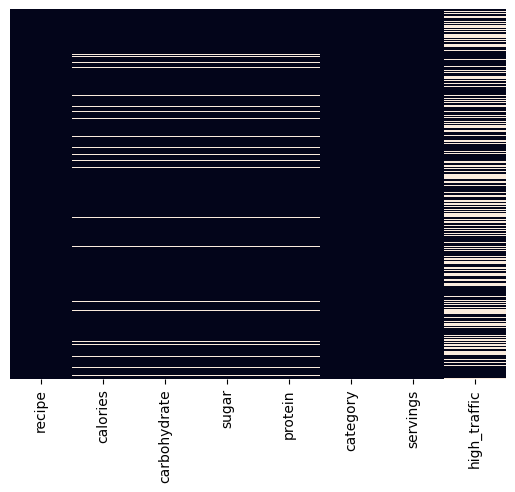

In [976]:
pd.set_option('display.max_columns', None)
df = pd.read_csv("recipe_site_traffic_2212.csv")
print(df.shape)
print(df.info())
print(df.head())
print(df.isna().sum())
sns.heatmap(df.isnull(),yticklabels= False,cbar = False)

In [977]:
print(df['high_traffic'].value_counts())

High    574
Name: high_traffic, dtype: int64


In [978]:
# function displaying the unique values in the categorical and binary columns

def printunique(columns):
    for c in columns:
        print (df[c].unique())
        
columns = ['category', 'servings', 'high_traffic']

printunique(columns)

['Pork' 'Potato' 'Breakfast' 'Beverages' 'One Dish Meal' 'Chicken Breast'
 'Lunch/Snacks' 'Chicken' 'Vegetable' 'Meat' 'Dessert']
['6' '4' '1' '2' '4 as a snack' '6 as a snack']
['High' nan]


The dataset contains 947 rows and 8 columns. The columns 'calories', 'carbonhydrate', 'sugar', and 'protein' have 52 missing values. The same observations contain all the missing values in these columns. There are 574 instances where the 'high_traffic' column is labeled as 'High', while the rest of the observations are marked as 'NaN'. It is likely that the 'NaN' values correspond to non-high values. The validation of the data is presented below:

- 'recipe' is same as the description without missing values.
- 'calories' is same as the description with 52 missing values.
- 'carbohydrate' is same as description with 52 missing values. The missing values are replaced after the split of dataset into train and test sets with the overall average weight in the train and test sets to prevent the data leakage.
- 'sugar' is same as description with 52 missing values. 
- 'protein' is same as description with 52 missing values. 
- As the missing values in the 'calories', carbohydrate', 'sugar', and 'protein' columns account for around 5% of the observations, they have been removed from the dataset.
- 'category' has no missing values but there 'Chicken' is expressed as 'Chicken Breast' in some observations. To fix this issue, the 'Breast' is stripped from the relevant expressions.
- Although 'servings' is described as a numeric column, it includes expressions such as '4 as a snack' and '6 as a snack'. These expressions have been fixed, and the data type of the column has been changed to integer.
- For the analysis, the 'NaN' values in the 'high_traffic' column have been labeled as '0', while 'High' values have been labeled as '1'. The data type of the column is converted to integer. 


In [979]:
# correcting the values in 'category' 
mapping = {'Chicken Breast': 'Chicken'}

df['category'] = df['category'].replace(mapping)

df['category'].unique()

array(['Pork', 'Potato', 'Breakfast', 'Beverages', 'One Dish Meal',
       'Chicken', 'Lunch/Snacks', 'Vegetable', 'Meat', 'Dessert'],
      dtype=object)

In [980]:
# correcting the values in 'servings' and the datatype
mapping = {'4 as a snack': '4', '6 as a snack': '6'}
df['servings'] = df['servings'].replace(mapping)
df['servings'].unique()
df['servings'] = df['servings'].astype('int')

In [981]:
# correcting the values in 'high_traffic' and the datatype
df['high_traffic'] = df['high_traffic'].fillna('0')
df['high_traffic'].replace('High', '1', inplace = True)
print(df['high_traffic'].unique())
df['high_traffic'] = df['high_traffic'].astype('int')
df['high_traffic'].dtype

['1' '0']


dtype('int64')

In [982]:
# dropping observations with missing values
df.dropna(subset = ['calories', 'carbohydrate', 'sugar', 'protein'], inplace = True)

# Exploratory Data Analysis

## Examing the distribution of numeric values

In [983]:
df.iloc[:,1:-3].describe()

,calories,carbohydrate,sugar,protein
count,895.000000,895.000000,895.000000,895.000000
mean,435.939196,35.069676,9.046547,24.149296
std,453.020997,43.949032,14.679176,36.369739
min,0.140000,0.030000,0.010000,0.000000
25%,110.430000,8.375000,1.690000,3.195000
50%,288.550000,21.480000,4.550000,10.800000
75%,597.650000,44.965000,9.800000,30.200000
max,3633.160000,530.420000,148.750000,363.360000


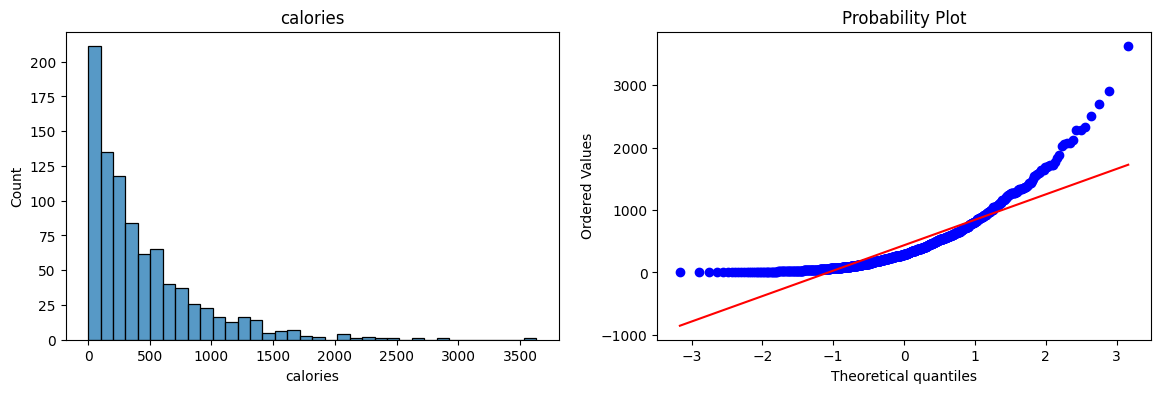

<Figure size 640x480 with 0 Axes>

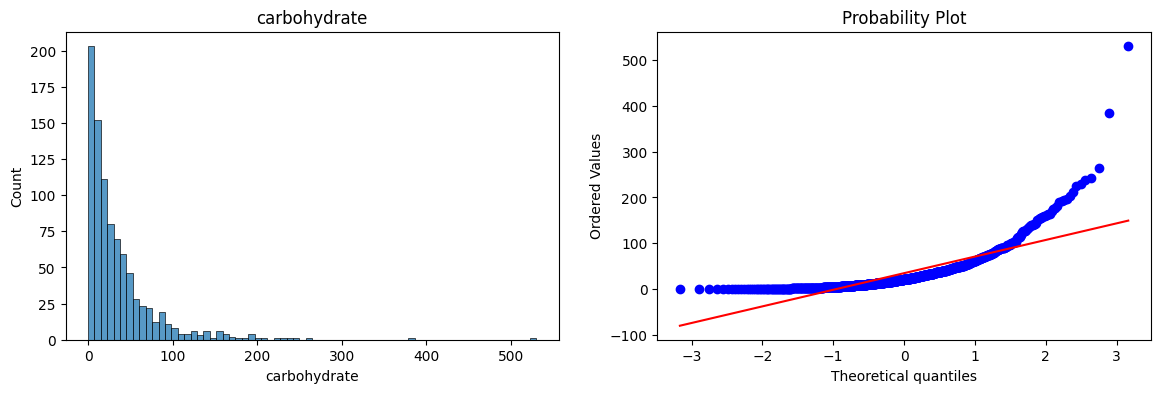

<Figure size 640x480 with 0 Axes>

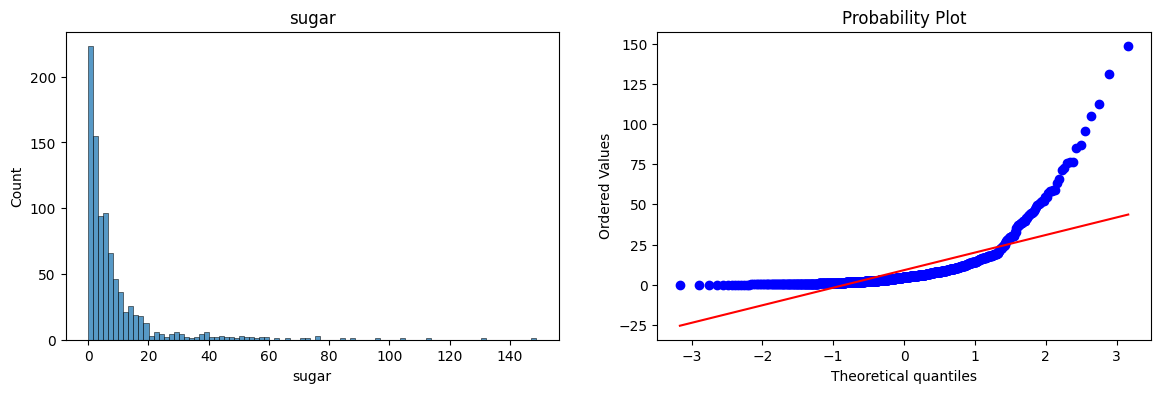

<Figure size 640x480 with 0 Axes>

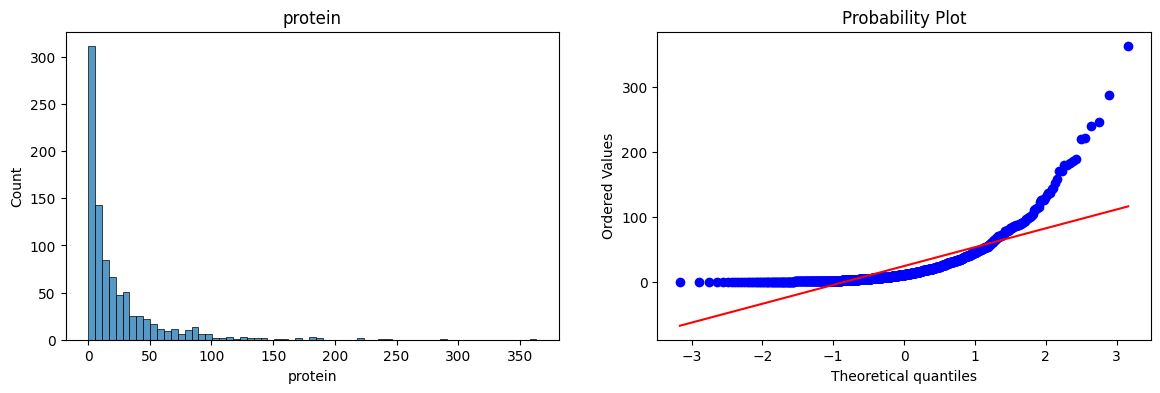

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [984]:
for i in df.iloc[:,[1,2,3,4,7]].columns:
    if(i != 'high_traffic'):
        plt.figure(figsize = (14,4))
        plt.subplot(1,2,1)
        #the figure has 1 row, 2 columns, and this plot is the first (1) plot.
        sns.histplot(x =df[i])
        plt.title(i)
    
        plt.subplot(1,2,2)
        #the figure has 1 row, 2 columns, and this plot is the second (2) plot.
        stats.probplot(x =df[i], dist ='norm', plot = plt)               
    plt.show()
    
    plt.savefig('numeric_histplot.png')


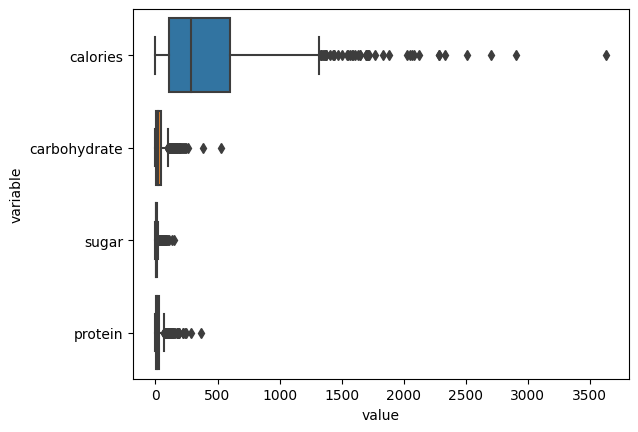

In [985]:
sns.boxplot(y="variable", x="value", 
            data=pd.melt(df.iloc[:,[1,2,3,4]]))
plt.savefig('sns_boxplot.png')


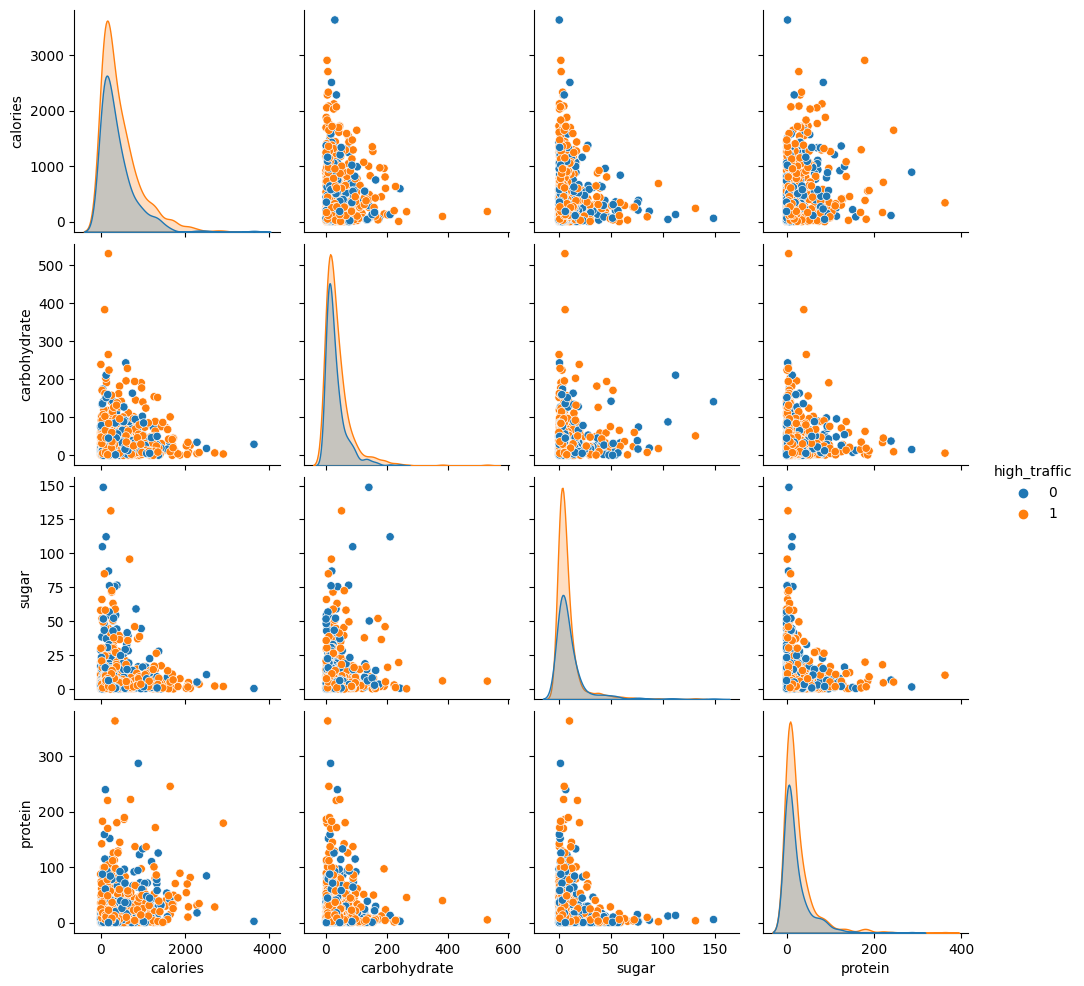

In [986]:
sns.pairplot(df.iloc[:,[1,2,3,4,7]], hue = 'high_traffic')
plt.savefig('sns_pairplot.png')

In [987]:
for col in ['calories', 'carbohydrate', 'sugar',  'protein']:
    q75,q25 = np.percentile(df.loc[:,col],[75,25])
    intr_qr = q75-q25
    max = q75+(3*intr_qr)
    min = q25-(3*intr_qr)
    df.loc[df[col] < min,col] = -10000
    df.loc[df[col] > max,col] = 10000
    
    
df = df[(df['calories']!=10000)  & ((df['carbohydrate']!=10000) & (df['sugar']!=10000)) & (df['protein']!=10000) ]
df.shape

(786, 8)

Since the distributions of the numerical values are significantly different, it would be a good idea to scale the variables before conducting any analysis. Furthermore, there are several outliers in each variable. Values that are more than 3 times the interquartile range (IQR) away from the first and third quartiles (Q1 and Q3) have been removed from the dataset.In addition, the variables have right-skewed distributions, so it would be a good idea to perform a power transformation on them before conducting any analysis.

After removing the missing values and outliers:
a) The '1' (high traffic) class has the most observations: 466.
b) Observations are not balanced across the categories because class '1' has more than observations (466) than the class '0' (320). However, the class imbalance is not a major concern since the minority class, which is '0', constitutes roughly 40% of the observations.

1    466
0    320
Name: high_traffic, dtype: int64

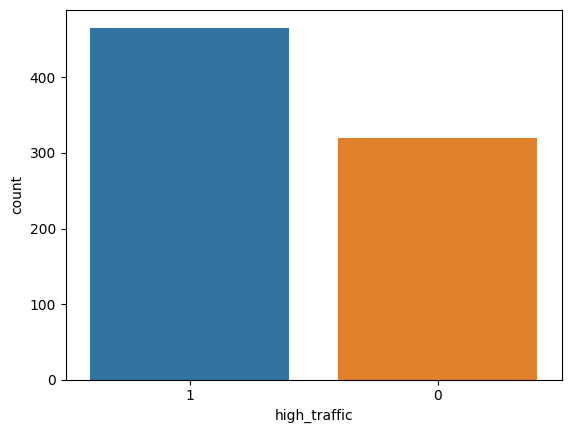

In [988]:
# plot showing the number of observations in each class
sns_cp = sns.countplot(x= 'high_traffic', data = df, order = df['high_traffic'].value_counts().index)
plt.savefig('sns_hightraffic_countplot.png')
df['high_traffic'].value_counts()

1    466
0    320
Name: high_traffic, dtype: int64

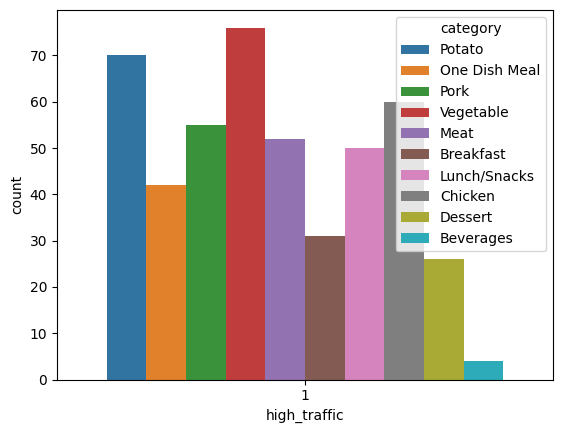

In [1008]:
sns_cp = sns.countplot(x= 'high_traffic', hue = 'category', data = df[df['high_traffic']==1])

plt.savefig('sns_hightraffic_countplot.png')
df['high_traffic'].value_counts()

The most frequent number of servings is 4. The frequencies of other values 6, 2, and 1 are very similar to each other.

4    325
6    158
2    152
1    151
Name: servings, dtype: int64

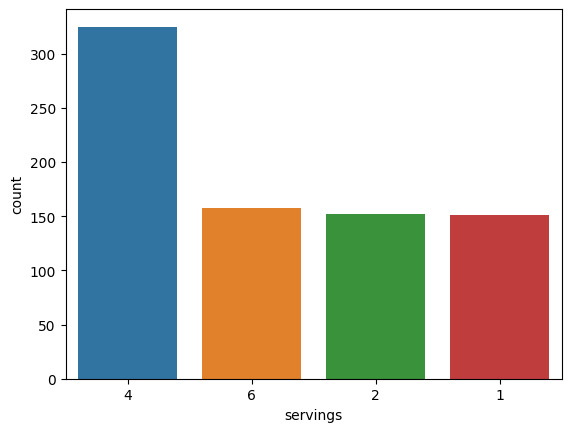

In [989]:

# plot showing the number of servings
sns_cp = sns.countplot(x= 'servings', data = df, order = df['servings'].value_counts().index)
plt.savefig('sns_servings_countplot.png')
df['servings'].value_counts()

## Examining the correlation between numeric values

There is no significant correlation between the numerical variables. There is no requirement to eliminate or merge any of the features to address collinearity.

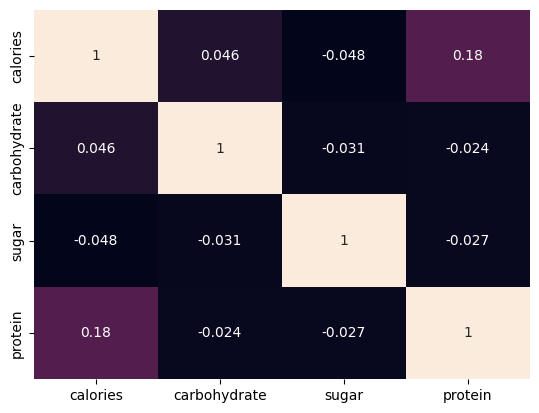

In [990]:
sns.heatmap(df.iloc[:,[1,2,3,4]].corr(),annot= True, cbar = False)
plt.savefig('sns_heatmap1.png')

In [991]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 786 entries, 1 to 946
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   recipe        786 non-null    int64  
 1   calories      786 non-null    float64
 2   carbohydrate  786 non-null    float64
 3   sugar         786 non-null    float64
 4   protein       786 non-null    float64
 5   category      786 non-null    object 
 6   servings      786 non-null    int64  
 7   high_traffic  786 non-null    int64  
dtypes: float64(4), int64(3), object(1)
memory usage: 55.3+ KB


# Methodology

As we are trying to predict which recipes will be popular, this is a classification problem with two possible outcomes (binary). Logistic regression will be used as the baseline model, while the random forest classifier will be used as the comparative model.

In [992]:
# splitting data
X = df.drop('high_traffic', axis =1)
columns = X.columns
y = df['high_traffic']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state = 123)

In [993]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 589 entries, 272 to 100
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   recipe        589 non-null    int64  
 1   calories      589 non-null    float64
 2   carbohydrate  589 non-null    float64
 3   sugar         589 non-null    float64
 4   protein       589 non-null    float64
 5   category      589 non-null    object 
 6   servings      589 non-null    int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 36.8+ KB


In [994]:
#power transform and standard scaling

pt = PowerTransformer()
std_scaler = StandardScaler()

X_train_06 = X_train.iloc[:,[0,6]]
X_train_1234 = pd.DataFrame(data =std_scaler.fit_transform(pt.fit_transform(X_train.iloc[:,[1,2,3,4]])),columns = X_train.iloc[:,[1,2,3,4]].columns)

# Encoding categorical variable
X_train_dummies = pd.get_dummies(X_train['category'], drop_first= True)
X_train = pd.concat([X_train_1234.reset_index(drop=True), X_train_dummies.reset_index(drop=True), X_train_06.reset_index(drop=True)], axis = 1)

# test set
X_test_06 = X_test.iloc[:,[0,6]]
X_test_1234 = pd.DataFrame(data =std_scaler.fit_transform(pt.fit_transform(X_test.iloc[:,[1,2,3,4]])),columns = X_test.iloc[:,[1,2,3,4]].columns)

X_test_dummies = pd.get_dummies(X_test['category'], drop_first= True)
X_test = pd.concat([X_test_1234.reset_index(drop=True), X_test_dummies.reset_index(drop=True), X_test_06.reset_index(drop=True)], axis = 1)


Since the ranges of the numeric values vary greatly, it is necessary to scale them to avoid any influence on the models. In addition, since all of the numeric features are right-skewed, using power transformation is a suitable approach to address this skewness issue.

#Logistic Regression

A logistic regression is conducted with the hyparparameters 'liblinear' as the solver, 'l1' as the penalty, and 'C'=10. Optimum 'C' value is obtained through randomizedseachcv.

In [995]:
param_grid = {'C': [10, 100, 200, 1000]}

logistic=  LogisticRegression(solver='liblinear', penalty = 'l1', random_state = 123)
model = RandomizedSearchCV(estimator = logistic, param_distributions = param_grid)
model.fit(X_train,y_train)
print(model.best_estimator_)
print(model.best_estimator_.coef_, model.best_estimator_.intercept_)
logistic_best_pred = model.best_estimator_.predict(X_test)
logistic_best_pred_probs = model.best_estimator_.predict_proba(X_test)[:,1]


LogisticRegression(C=10, penalty='l1', random_state=123, solver='liblinear')
[[ 2.69779773e-02 -8.61261831e-02 -8.40309729e-02 -7.73931959e-02
   1.88884251e+00  2.25968017e+00  3.16193366e+00  3.45977528e+00
   3.88832800e+00  3.55206562e+00  4.33357052e+00  5.25870065e+00
   6.54535466e+00 -4.57024466e-04  3.06962823e-02]] [-2.48821466]


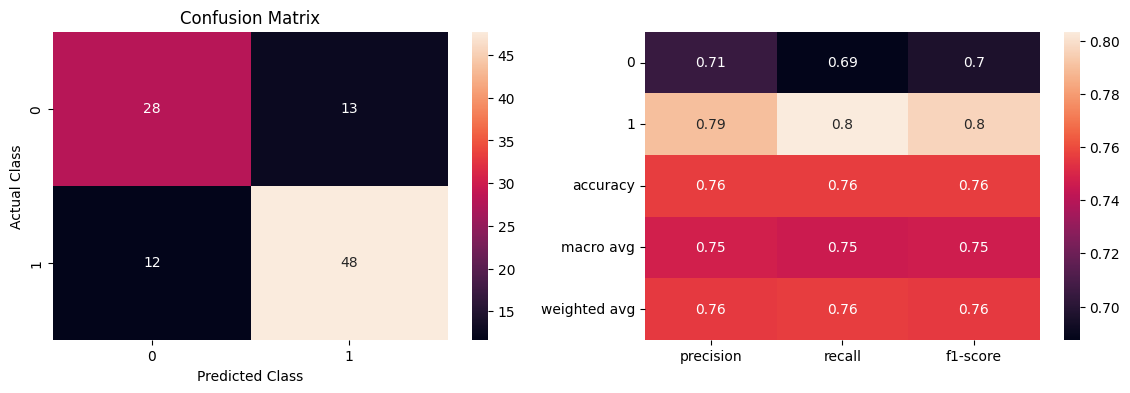

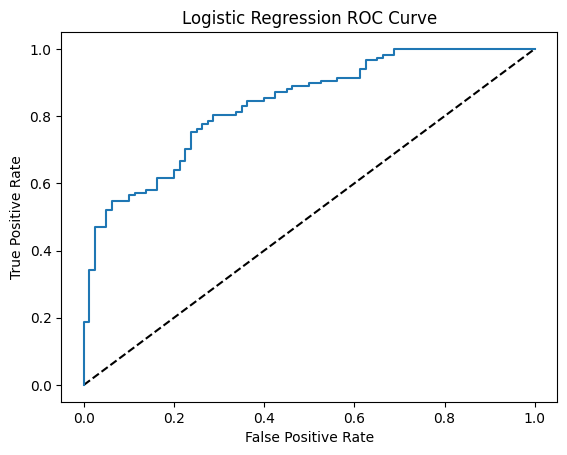

auc_score is: 0.8351495726495726


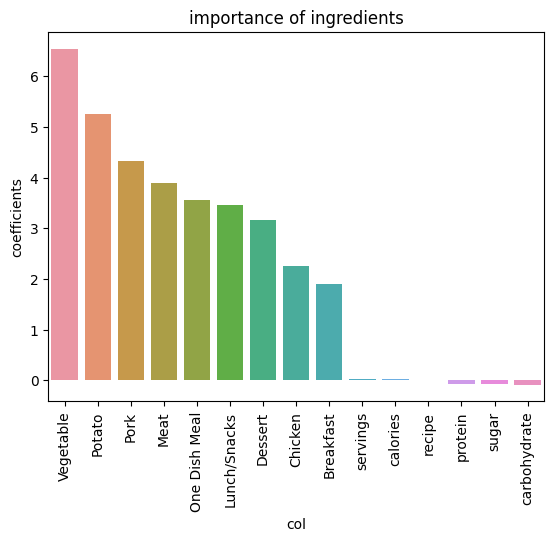

In [996]:
con_mat = confusion_matrix(y_test,logistic_best_pred)
plt.figure(figsize=(14,4)) 
plt.subplot(1,2,1)
sns.heatmap(con_mat/np.sum(con_mat)*100,annot =True)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')

plt.subplot(1,2,2)
sns.heatmap(pd.DataFrame(classification_report(y_test,logistic_best_pred,output_dict=True)).T.iloc[:,:-1], annot = True)
plt.savefig('sns_heatmap2.png')
plt.show()

# plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, logistic_best_pred_probs)
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.savefig('Roc_curve1.png')
plt.show()

# roc_auc_score
print('auc_score is:', roc_auc_score(y_test, logistic_best_pred_probs))

#plot coefficients
columns = X_train.columns
coefficients = model.best_estimator_.coef_.flatten().tolist()
coef = pd.DataFrame({'col': columns, 'coefficients': coefficients})
coef.sort_values(by = 'coefficients', ascending = False, inplace = True)
sns.barplot(x ='col', y = 'coefficients', data = coef)
plt.title('importance of ingredients')
plt.xticks(rotation=90)
plt.savefig('importance1.png')

In [997]:
# Random forest classifier

A random forest classifier is implemented with the hyperparameters max_depth=6, min_samples_leaf=6, min_samples_split=7,and n_estimators=20. These values are obtained through randomizedsearchcv.

In [998]:
param_grid = {'max_depth': [2, 4,6],
               'max_features': ['auto', 'sqrt'],
               'min_samples_leaf': [4, 6, 8],
               'min_samples_split': [5, 7,10],
               'n_estimators': [20]}

rfc = RandomForestClassifier()
model = RandomizedSearchCV(estimator = rfc, param_distributions = param_grid, random_state = 123)
model.fit(X_train,y_train)
print(model.best_estimator_)
feature_importances= model.best_estimator_.feature_importances_
print(feature_importances)
rfc_best_pred = model.best_estimator_.predict(X_test)
rfc_best_pred_probs = model.best_estimator_.predict_proba(X_test)[:,1]

RandomForestClassifier(max_depth=6, min_samples_leaf=6, min_samples_split=7,
                       n_estimators=20)
[0.07757527 0.05185733 0.09906185 0.25974923 0.14123286 0.06843344
 0.00203075 0.00253959 0.01746338 0.00553958 0.01927476 0.06740337
 0.10067792 0.05654715 0.0306135 ]


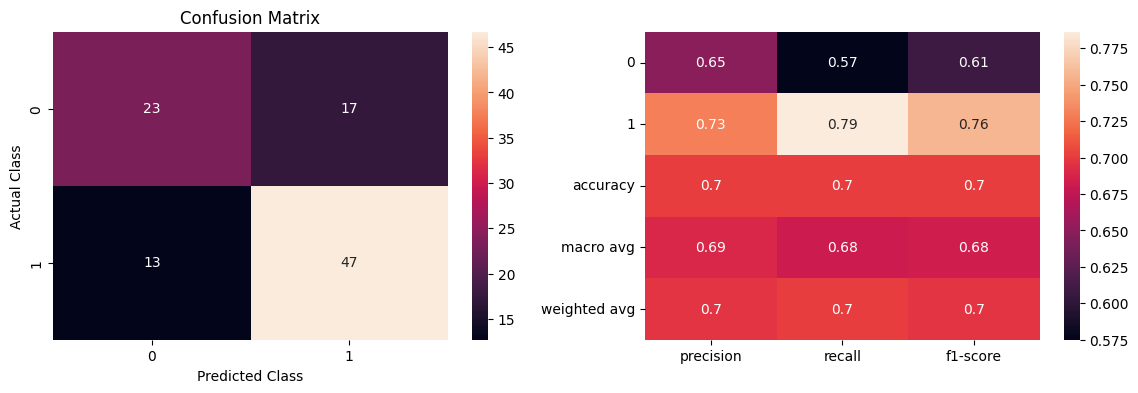

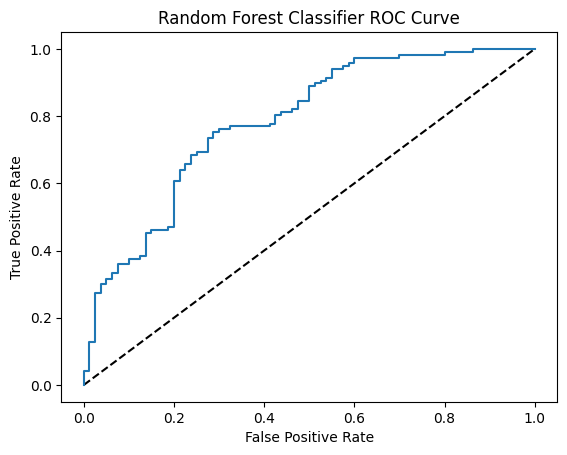

auc_score is: 0.783119658119658


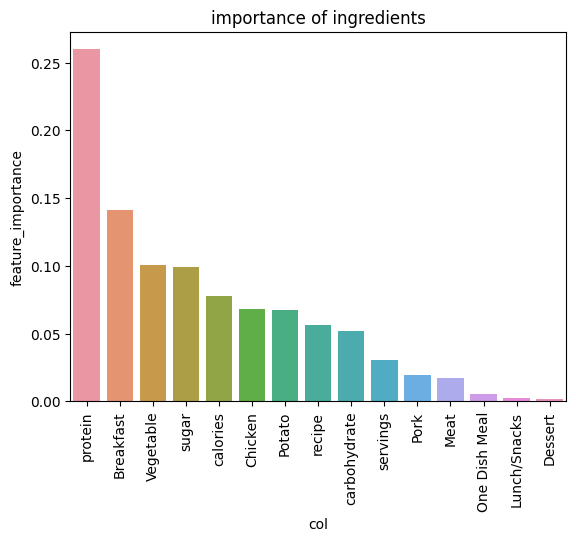

In [999]:
con_mat = confusion_matrix(y_test,rfc_best_pred)
plt.figure(figsize=(14,4)) 
plt.subplot(1,2,1)
sns.heatmap(con_mat/np.sum(con_mat)*100,annot =True)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')

plt.subplot(1,2,2)
sns.heatmap(pd.DataFrame(classification_report(y_test,rfc_best_pred,output_dict=True)).T.iloc[:,:-1], annot = True)
plt.savefig('sns_heatmap3.png')
plt.show()

# plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, rfc_best_pred_probs)
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest Classifier ROC Curve')
plt.savefig('ROC_curve2.png')
plt.show()

# roc_auc_score
print('auc_score is:', roc_auc_score(y_test, rfc_best_pred_probs))

# plot feature importances
columns = X_train.columns
feat_imp = pd.DataFrame({'col': columns, 'feature_importance':feature_importances})
feat_imp.sort_values(by = 'feature_importance', ascending = False, inplace = True)
sns.barplot(x ='col', y = 'feature_importance', data = feat_imp)
plt.title('importance of ingredients')
plt.xticks(rotation=90)
plt.savefig('importance2.png')

The logistic regression model is more appropriate for the goal of predicting which recipes will be popular and minimizing the chance of showing unpopular recipes. This is because the logistic regression model has a precision of 0.8 for the popular class, which means that the proportion of true positives out of all predicted positives is 80%, and this is higher than the precision of 0.74 in the random forest classifier model.

Furthermore, the logistic regression model also outperforms the random forest classifier model in other metrics such as accuracy, AUC score, recall, and F1 score. The accuracy of the logistic regression model is 77%, which is higher than the 74% accuracy of the random forest classifier model. Additionally, the AUC score of the logistic regression model is 0.84, which is also higher than the 0.81 AUC score of the random forest classifier model. In terms of recall and F1 score, the logistic regression model also performs better than the random forest classifier model.

The logistic regression model meets the business objective of predicting which recipes will be popular with 80% accuracy and minimizing the chances of displaying unpopular recipes. Therefore, based on these metrics and the goal of optimizing precision to minimize the chance of showing unpopular recipes, the logistic regression model is the more appropriate choice.

From the results, it can be inferred that the category of a recipe have a significant impact on its popularity, while the nutritional values such as calories, protein, sugar, and carbohydrates do not seem to be as important in determining popularity, despite being important for health considerations. Therefore, the business should focus on promoting recipes that feature popular ingredients such as vegetables, potatoes, pork, and meat to increase the chances of user engagement and interest.

By tracking the number of clicks each category receives, the business can gain insights into which categories are most popular among users. This information can then be used to create targeted promotions and display popular recipes prominently on the website's home page, increasing the likelihood that users will click on them and potentially subscribe to the website.

This approach can also help the business to continuously monitor which types of recipes are popular and adjust their promotions accordingly, ensuring that they are always displaying the most relevant and engaging content to users.

## ✅ When you have finished...
-  Publish your Workspace using the option on the left
-  Check the published version of your report:
	-  Can you see everything you want us to grade?
    -  Are all the graphics visible?
-  Review the grading rubric. Have you included everything that will be graded?
-  Head back to the [Certification Dashboard](https://app.datacamp.com/certification) to submit your practical exam report and record your presentation